In [31]:
import numpy as np
from numpy import subtract as min
from numpy import multiply as mult
from numpy import divide as div
from numpy.random import randint as random
example_no=1000
test_example_no=1000
bacth_size=100
epoches_no=200
dx=.001
x_train,y_train,x_test,y_test=[],[],[],[]

In [32]:
def polynomial(x):
  return x*x
for _ in range(example_no):
  vec1,vec2=[],[]
  for k in range(3):
    i=random(1000,10001)/1000
    vec1.append(i)
    vec2.append(polynomial(i))
  x_train.append(vec1)
  y_train.append(vec2)
for _ in range(test_example_no):
  vec1,vec2=[],[]
  for k in range(3):
    i=random(1000,10001)/1000
    vec1.append(i)
    vec2.append(polynomial(i))
  x_test.append(vec1)
  y_test.append(vec2)


In [33]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def ReLu(x):
  return max(0.1*x,x)
class layer:
  def __init__(self,inputSize,outputSize,activation_type):
    self.weigths=[[random(1,101)/100 for _ in range(inputSize)] for _ in range(outputSize)]
    self.baises=[random(1,101)/100  for _ in range(outputSize)]
    self.actvation_type=activation_type
    self.outputSize=outputSize
    self.inputSize=inputSize
    self.activation_run_layer,self.node_run_layer,self.der_activation_layer=[0 for _ in range(outputSize)],[0 for _ in range(outputSize)],[0 for _ in range(outputSize)]
    self.LR=0.001
    self.input=[[]]

  def runLayer(self,inputVec):
    self.input[0]=inputVec # inputing 2d array rather then 1d array
    for index in range(self.outputSize):
      self.node_run_layer[index]=(np.dot(self.weigths[index],inputVec)+self.baises[index])
    if self.actvation_type=='relu' :
      for index in range(self.outputSize):
        self.activation_run_layer[index]=(max(0,self.node_run_layer[index]))
    if self.actvation_type=='sigmoid' :
      for index in range(self.outputSize):
        self.activation_run_layer[index]=sigmoid(self.node_run_layer[index])

  def derivative_activation_layer(self):
    if self.actvation_type == 'relu':
      for i in range (self.outputSize):
        if self.node_run_layer[i] > 0:
          self.der_activation_layer[i]=1
        else:
          self.der_activation_layer[i]=0
    elif self.actvation_type=='sigmoid':
      for i in range(self.outputSize):
        self.der_activation_layer[i]=sigmoid(self.node_run_layer[i])*(1-sigmoid(self.node_run_layer[i]))

  def UpdateParameter(self,derivative_weigths,derivative_baises,bacth_size):
    self.weigths=min(self.weigths , div(mult(self.LR,derivative_weigths),bacth_size))
    self.baises=min(self.baises , div(mult(self.LR,derivative_baises), bacth_size))

In [34]:
def runModel(model,inputVec):
  for i in range(len(model)):
    model[i].runLayer(inputVec)
    inputVec=model[i].activation_run_layer

def loss(model,x_train_single,y_train_single):
  runModel(model,x_train_single)
  return sum(min(y_train_single,model[len(model)-1].activation_run_layer))*sum(min(y_train_single,model[len(model)-1].activation_run_layer))
def Avgcost(model,x,y):
  cost=0
  for i in range(len(x)):
    cost+=loss(model,x[i],y[i])
  return cost/len(x)

In [35]:
def HardWayDervtivateWeigths(model,x_train_single,y_train_single):
    loss1=loss(model,x_train_single,y_train_single)
    for layer in range(len(model)):
      for node in range(len(model[layer].weigths)):
        for back_node in range(len(model[layer].weigths[node])):
          model[layer].weigths[node][back_node]+=dx
          loss2=loss(model,x_train_single,y_train_single)
          derv=(loss2-loss1)/dx
          print(derv)
          model[layer].weigths[node][back_node]-=dx
def HardWayDervtivateBaises(model,x_train_single,y_train_single):
    loss1=loss(model,x_train_single,y_train_single)
    for layer in range(len(model)):
      for node in range(len(model[layer].baises)):
          model[layer].baises[node]+=dx
          loss2=loss(model,x_train_single,y_train_single)
          derv=(loss2-loss1)/dx
          print(derv)
          model[layer].baises[node]-=dx

In [36]:
def backProp(model,x_train_single,y_train_single,bacth_size):
  len_of_model=len(model)
  runModel(model,x_train_single)
  predicted_output=model[len_of_model-1].activation_run_layer
  expected_output=y_train_single
  dervatie_of_layer,dervatie_of_weigths,dervatie_of_baises=[[0] for i in range(len_of_model)],[[0] for i in range(len_of_model)],[[0] for i in range(len_of_model)]
  # calculating last layer dervatie
  model[len_of_model-1].derivative_activation_layer()
  dervatie_of_layer[len_of_model-1]=[model[len_of_model-1].der_activation_layer * min(expected_output , predicted_output  )  * -2]
  for index in range(len_of_model-2,-1,-1):
    model[index].derivative_activation_layer()
    dervatie_of_layer[index]=[np.sum(mult(model[index].der_activation_layer , model[index+1].weigths ) * np.transpose(dervatie_of_layer[index+1]),axis=0)]
  for index in range(len_of_model):
    dervatie_of_weigths[index]=mult( model[index].input,np.transpose(dervatie_of_layer[index]) )
    model[index].UpdateParameter(dervatie_of_weigths[index],dervatie_of_layer[index][0],bacth_size)
  return model
def trainModel(model,epoches_no,x,y,bacth_size):
  for epoches in range(epoches_no):
    for example_index in range(len(x)):
      model=backProp(model1,x[example_index],y[example_index],bacth_size)
  return model


In [39]:
model1=[layer(inputSize=3,outputSize=10,activation_type='relu'),
        layer(inputSize=10,outputSize=10,activation_type='relu'),
        layer(inputSize=10,outputSize=3,activation_type='relu')]
# HardWayDervtivateBaises(model1,x_train[0],y_train[0])
print("starting Avg cost on traning set:",Avgcost(model1,x_train,y_train))
print("starting Avg cost on testing set:",Avgcost(model1,x_test,y_test))
model1=trainModel(model1,epoches_no,x_train,y_train,bacth_size)
print("ending Avg cost on traning set:",Avgcost(model1,x_train,y_train))
print("ending Avg cost on test set:",Avgcost(model1,x_test,y_test))
print("this error are based on 3 output so, avg cost as per 3 output or simple cost of 1+2+3 is equal to our cost ")

starting Avg cost on traning set: 547143.4833156489
starting Avg cost on testing set: 565503.9000455178
ending Avg cost on traning set: 3.4324805483673972
ending Avg cost on test set: 3.691503177863371
this error are based on 3 output so, avg cost as per 3 output or simple cost of 1+2+3 is equal to our cost 


blue is groung truth
orange is perdection of model


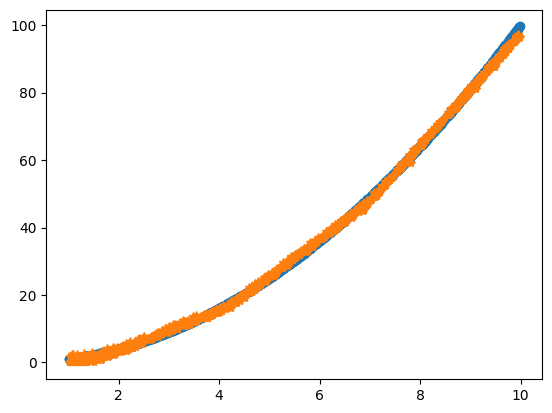

In [38]:
x_axis=[]
y_axis1=[]
y_axis2=[]
for i in x_test:
  runModel(model1,i)
  x_axis.append(float(i[0]))
  y_axis1.append(polynomial( float(i[0]) ))
  y_axis2.append(float(model1[len(model1)-1].activation_run_layer[0]))

import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis1,"o")
plt.plot(x_axis, y_axis2,"*")
print("blue is groung truth")
print("orange is perdection of model")
plt.show()